In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import pickle

In [2]:
DATASET_PATH = "Covid India Dataset/"

In [3]:
merged = pd.read_csv(DATASET_PATH + "merged.csv")

In [4]:
# remove locations with india as location
merged = merged[merged["Location"] != "India"]
x = merged["Sequence"]
y = merged["Location"]

In [ ]:
# plot a bar graph of the top 20 locations
plt.figure(figsize=(8, 3))
y.value_counts().head(20).plot(kind="bar")
plt.show()

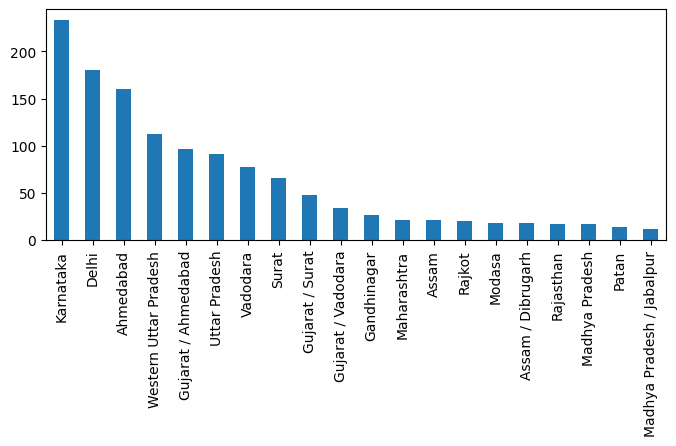

In [5]:
# remove india substring from location
merged["Location"] = merged["Location"].apply(lambda x: x.replace("India /", "").strip())
x = merged["Sequence"]
y = merged["Location"]
plt.figure(figsize=(8, 3))
y.value_counts().head(20).plot(kind="bar")
plt.show()

In [6]:
# remove locations with less than 4 cases
counts = y.value_counts()
counts = counts[counts >= 5]
merged = merged[merged["Location"].isin(counts.index)]
x = merged["Sequence"]
y = merged["Location"]

In [7]:
# balance the dataset
ros = RandomOverSampler(random_state=24)
x, y = ros.fit_resample(np.array(x).reshape(-1, 1), y)

In [8]:
x = pd.DataFrame(x, columns=["Sequence"])
y = pd.DataFrame(y, columns=["Location"])

In [ ]:
plt.figure(figsize=(8, 3))
y.value_counts().head(20).plot(kind="bar")
plt.show()

In [72]:
x_train, x_test, y_train, y_test = sk.model_selection.train_test_split(x, y, test_size=0.2, random_state=42)


In [73]:
# convert sequence to k mer words of length n
def getKmers(sequence, size=3):
    seq = [sequence[x:x + size].lower() for x in range(len(sequence) - size + 1)]
    n_str = "n"*size
    seq = [x if n_str not in x else "" for x in seq]
    seq = " ".join(seq)
    return seq

x_train = x_train.apply(lambda x: getKmers(x["Sequence"]), axis=1)
x_test = x_test.apply(lambda x: getKmers(x["Sequence"]), axis=1)

# convert it to an array of strings
x_train = np.array(x_train)
x_test = np.array(x_test)


In [74]:
# create a count vectorizer
cv = CountVectorizer(ngram_range=(2,2))

# fit and transform x_train
x_train = cv.fit_transform(x_train)
# transform x_test
x_test = cv.transform(x_test)

In [75]:
# save the count vectorizer
pickle.dump(cv, open("count_vectorizer.pkl", "wb"))

In [76]:

y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [ ]:
# create a multinomial naive bayes classifier
nb_classifier = MultinomialNB()
# fit the classifier to x_train and y_train
nb_classifier.fit(x_train, y_train)
# save the classifier
pickle.dump(nb_classifier, open("nb_classifier.pkl", "wb"))

# predict the labels of x_test
y_pred = nb_classifier.predict(x_test)

# calculate the accuracy of the model
sk.metrics.accuracy_score(y_test, y_pred)

In [ ]:
# create a logistic regression classifier
lr_classifier = LogisticRegression()
# fit the classifier to x_train and y_train
lr_classifier.fit(x_train, y_train)
# predict the labels of x_test
y_pred = lr_classifier.predict(x_test)
# calculate the accuracy of the model
sk.metrics.accuracy_score(y_test, y_pred)

# save the model
pickle.dump(lr_classifier, open("logistic_reg_model.pkl", "wb"))

In [77]:
# create a random forest classifier
rf_classifier = RandomForestClassifier()
# fit the classifier to x_train and y_train
rf_classifier.fit(x_train, y_train)
# predict the labels of x_test
y_pred = rf_classifier.predict(x_test)
# calculate the accuracy of the model
sk.metrics.accuracy_score(y_test, y_pred)


0.9680968096809681

In [78]:
# save the model to a pickle file
pickle.dump(rf_classifier, open("random_forest_model.pkl", "wb"))

In [ ]:
# svc
svc_classifier = SVC()
svc_classifier.fit(x_train, y_train)
y_pred = svc_classifier.predict(x_test)
sk.metrics.accuracy_score(y_test, y_pred)
pickle.dump(svc_classifier, open("svc_model.pkl", "wb"))

In [ ]:
print("Logistic Regression: ", sk.metrics.accuracy_score(y_test, lr_classifier.predict(x_test)))
print("Random Forest: ", sk.metrics.accuracy_score(y_test, rf_classifier.predict(x_test)))
print("SVC: ", sk.metrics.accuracy_score(y_test, svc_classifier.predict(x_test)))

In [ ]:
# test other models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(x_train, y_train)
y_pred = knn_classifier.predict(x_test)
sk.metrics.accuracy_score(y_test, y_pred)
pickle.dump(knn_classifier, open("knn_model.pkl", "wb"))

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(x_train, y_train)
y_pred = dt_classifier.predict(x_test)
sk.metrics.accuracy_score(y_test, y_pred)
pickle.dump(dt_classifier, open("dt_model.pkl", "wb"))

mlp_classifier = MLPClassifier()
mlp_classifier.fit(x_train, y_train)
y_pred = mlp_classifier.predict(x_test)
sk.metrics.accuracy_score(y_test, y_pred)
pickle.dump(mlp_classifier, open("mlp_model.pkl", "wb"))

gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(x_train, y_train)
y_pred = gb_classifier.predict(x_test)
sk.metrics.accuracy_score(y_test, y_pred)
pickle.dump(gb_classifier, open("gb_model.pkl", "wb"))

ab_classifier = AdaBoostClassifier()
ab_classifier.fit(x_train, y_train)
y_pred = ab_classifier.predict(x_test)
sk.metrics.accuracy_score(y_test, y_pred)
pickle.dump(ab_classifier, open("ab_model.pkl", "wb"))

print("KNN: ", sk.metrics.accuracy_score(y_test, knn_classifier.predict(x_test)))
print("Decision Tree: ", sk.metrics.accuracy_score(y_test, dt_classifier.predict(x_test)))
print("MLP: ", sk.metrics.accuracy_score(y_test, mlp_classifier.predict(x_test)))
print("Gradient Boosting: ", sk.metrics.accuracy_score(y_test, gb_classifier.predict(x_test)))
print("Ada Boosting: ", sk.metrics.accuracy_score(y_test, ab_classifier.predict(x_test)))


In [50]:
# test the random forest model on training data
y_pred = rf_classifier.predict(x_train)
sk.metrics.accuracy_score(y_train, y_pred)

0.9815655523455771

In [80]:
y_pred = rf_classifier.predict(x_test)

# for each location, calculate the accuracy
locations = np.unique(y_test)

locations = counts.index


for location in locations:
    loc_test = y_test[y_test == location]
    loc_pred = y_pred[y_test == location]
    print(location, ":", sk.metrics.accuracy_score(loc_test, loc_pred))



Karnataka : 0.9772727272727273
Delhi : 0.9069767441860465
Ahmedabad : 0.8181818181818182
Western Uttar Pradesh : 0.9682539682539683
Gujarat / Ahmedabad : 0.9423076923076923
Uttar Pradesh : 0.9534883720930233
Vadodara : 0.8723404255319149
Surat : 0.96
Gujarat / Surat : 1.0
Gujarat / Vadodara : 0.9534883720930233
Gandhinagar : 0.8148148148148148
Maharashtra : 1.0
Assam : 1.0
Rajkot : 0.98
Modasa : 0.9090909090909091
Assam / Dibrugarh : 0.675
Rajasthan : 1.0
Madhya Pradesh : 1.0
Patan : 1.0
Madhya Pradesh / Jabalpur : 1.0
Maharashtra / Mumbai : 1.0
Jamnagar : 1.0
Rajasthan / Jaipur : 1.0
Himatnagar : 1.0
Prantij : 1.0
Daskroi : 1.0
Gujarat / Sabarkantha : 1.0
Gujarat / Bhavnagar : 1.0
Gujarat / Bharuch : 1.0
Choryasi : 1.0
Gujarat / Rajkot : 1.0
Gujarat / Sutrapada : 1.0
Palanpur : 1.0
Dahegam : 1.0
Gujarat / Navsari : 1.0
Gujarat / Bodeli : 1.0
Assam / Silchar : 1.0
Kalol : 1.0
Meghalaya / Shillong : 1.0


In [86]:
# load cv and rf models
cv = pickle.load(open("count_vectorizer.pkl", "rb"))
rf_classifier = pickle.load(open("random_forest_model.pkl", "rb"))

# load the test data
test = open("seq.txt", "r").read()
test = pd.DataFrame([test], columns=["Sequence"])
test = test.apply(lambda x: getKmers(x["Sequence"]), axis=1)
test = np.array(test)


# transform the test data
test = cv.transform(test)

# predict the top 5 locations
pred = rf_classifier.predict_proba(test)[0]
pred = np.argsort(pred)[::-1][:5]

# print the top 5 locations
for i in pred:
    print(locations[i], ":", rf_classifier.predict_proba(test)[0][i])

Rajasthan / Jaipur : 0.75
Assam / Silchar : 0.03
Patan : 0.03
Himatnagar : 0.03
Karnataka : 0.02


In [87]:
test = pd.read_csv(DATASET_PATH + "merged.csv")
x_test = test["Sequence"]
y_test = test["Location"]

# load the models
cv = pickle.load(open("count_vectorizer.pkl", "rb"))
rf_classifier = pickle.load(open("random_forest_model.pkl", "rb"))

# transform the test data
x_test = x_test.apply(lambda x: getKmers(x))
x_test = np.array(x_test)
x_test = cv.transform(x_test)

# predict the labels
y_pred = rf_classifier.predict(x_test)

# save the predictions and actual labels to a dataframe
pred_df = pd.DataFrame(y_pred, columns=["Predicted"])
pred_df["Actual"] = y_test




In [107]:
# save a random sequence to seq.txt, print the actual locaation

index = 4104
test = pd.read_csv(DATASET_PATH + "merged.csv")

test = test.iloc[index]
print(test["Location"])

test = test["Sequence"]

with open("seq.txt", "w") as f:
    f.write(test)

# open the seq.txt file and predict the location
test = open("seq.txt", "r").read()
test = getKmers(test)

test = cv.transform([test])
pred = rf_classifier.predict(test)[0]

print(pred)

India / Delhi
Delhi


In [110]:
TXT_PATH = "Covid India Dataset/txt files/"

csv = pd.read_csv(DATASET_PATH + "merged.csv")
# split location using / and keep the last part
csv["Location"] = csv["Location"].apply(lambda x: x.split("/")[-1].strip())

# save the sequences to txt files
for i in range(len(csv)):
    txt_name = csv.iloc[i]["Location"] + "_" + str(i) + ".txt"
    with open(TXT_PATH + txt_name, "w") as f:
        f.write(csv.iloc[i]["Sequence"])
